In [1]:
import sys
print(sys.executable)

C:\Users\Admin\OneDrive\Documents\Market_Basket_Analysis\myenv\Scripts\python.exe


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset
file_path = r"C:\Users\Admin\Downloads\Online Retail.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTop 5 Products:")
print(df['Description'].value_counts().head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Top 5 Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNT

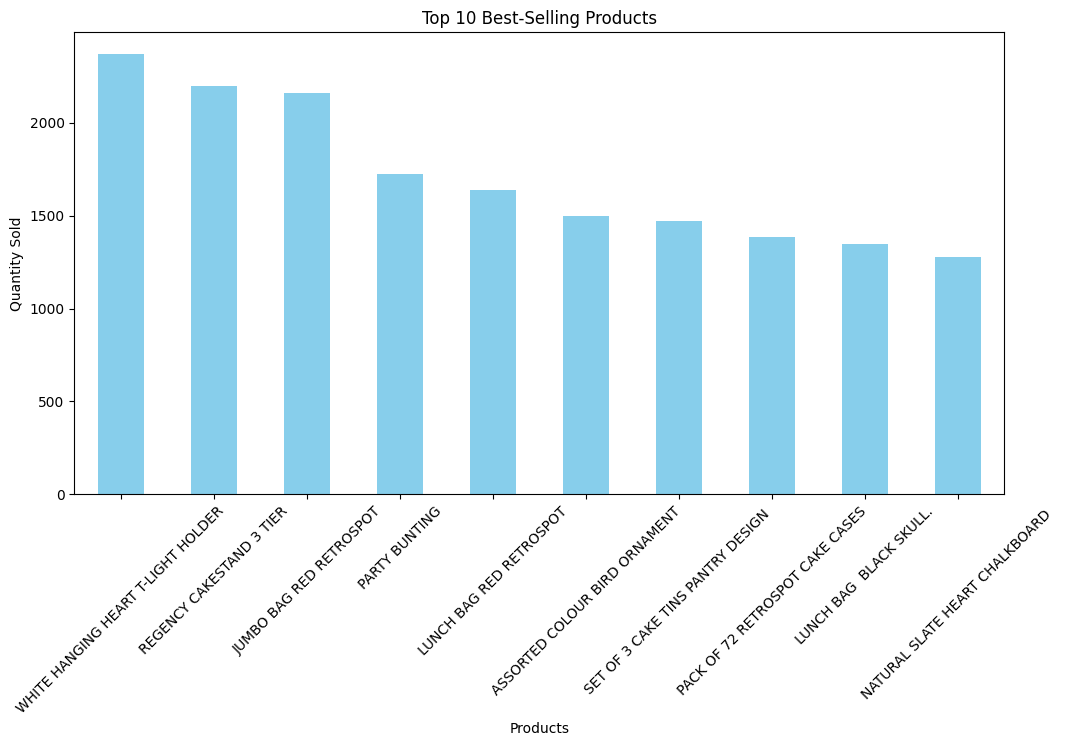

In [7]:
# Visualizing top 10 selling products
plt.figure(figsize=(12, 6))
df['Description'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Products")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

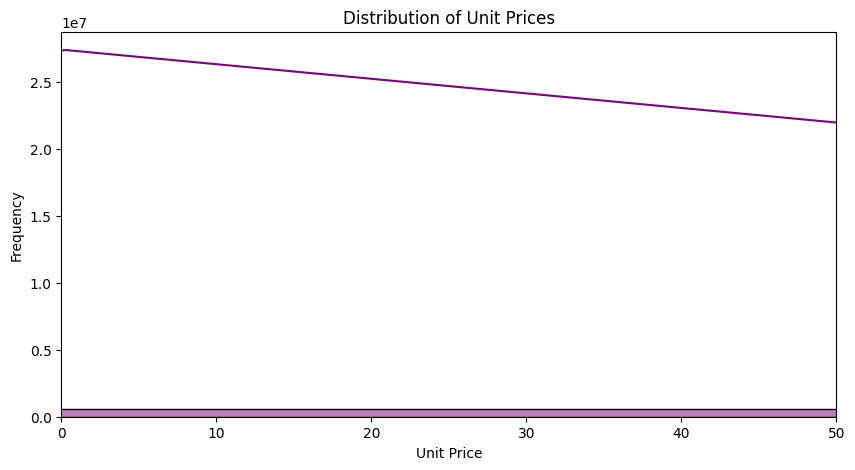

In [8]:
# Distribution of unit prices
plt.figure(figsize=(10, 5))
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='purple')
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.xlim(0, 50)  # Excluding extreme outliers
plt.show()

In [9]:
# Data Preprocessing
df = df[df['Quantity'] > 0]  
df = df[df['InvoiceNo'].astype(str).str.startswith('5')]  
df.dropna(subset=['CustomerID'], inplace=True)  
df['Description'] = df['Description'].str.strip() 

In [10]:
# Convert InvoiceDate to datetime & extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.day_name()

In [11]:
# Additional EDA
# Unique counts
print("Total unique products:", df['Description'].nunique())
print("Total transactions:", df['InvoiceNo'].nunique())
print("Total customers:", df['CustomerID'].nunique())

Total unique products: 3866
Total transactions: 18536
Total customers: 4339


In [12]:
# Most and least sold products
top_products = df['Description'].value_counts().head(10)
bottom_products = df['Description'].value_counts().tail(10)
print("Top 10 products:")
print(top_products)
print("Bottom 10 products:")
print(bottom_products)

Top 10 products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64
Bottom 10 products:
Description
CROCHET LILAC/RED BEAR KEYRING      1
SILVER AND BLACK ORBIT NECKLACE     1
LETTER "U" BLING KEY RING           1
AMBER GLASS/SHELL/PEARL NECKLACE    1
5 STRAND GLASS NECKLACE AMETHYST    1
RUBY GLASS CLUSTER NECKLACE         1
CLASSIC DIAMANTE NECKLACE JET       1
DIAMANTE NECKLACE BLACK             1
LETTER "T" BLING KEY RING           1
LETTER "O" BLING KEY RING           1
Name: count, dtype: int64


In [13]:
# Average items per transaction
avg_items_per_txn = df.groupby('InvoiceNo')['Quantity'].sum().mean()
print("Average items per transaction:", avg_items_per_txn)

Average items per transaction: 279.5476909797151


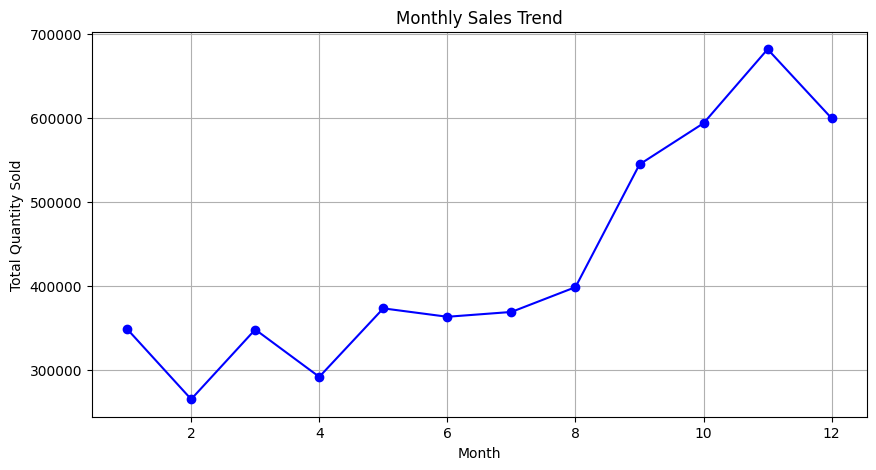

In [14]:
# Monthly sales trend
plt.figure(figsize=(10, 5))
df.groupby('Month')['Quantity'].sum().plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid()
plt.show()

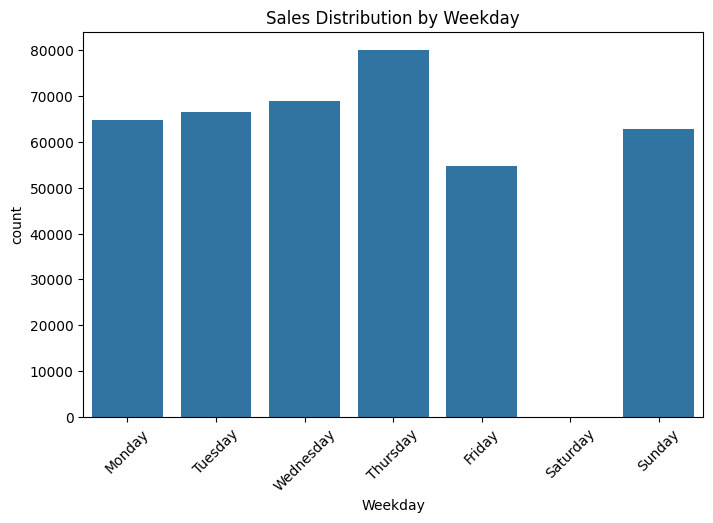

In [15]:
# Sales distribution by weekday
plt.figure(figsize=(8, 5))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales Distribution by Weekday")
plt.xticks(rotation=45)
plt.show()

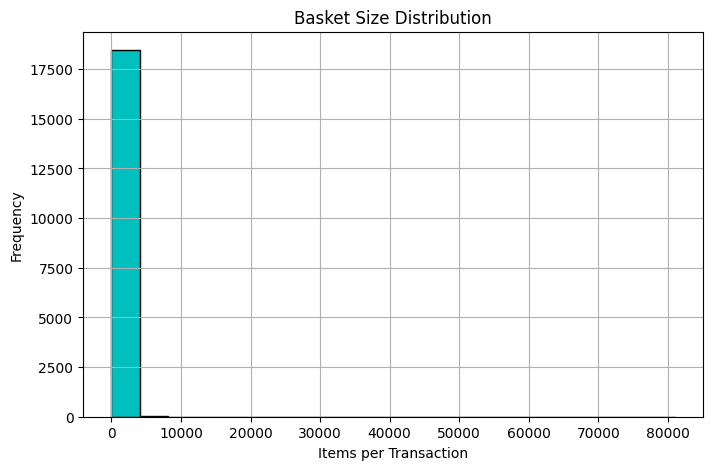

In [16]:
# Basket Size Distribution
plt.figure(figsize=(8, 5))
df.groupby('InvoiceNo')['Quantity'].sum().hist(bins=20, color='c', edgecolor='k')
plt.title("Basket Size Distribution")
plt.xlabel("Items per Transaction")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Convert dataset into a basket format
basket = df.pivot_table(index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)  

In [18]:
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [19]:
# Display top association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                       antecedents                           consequents  \
0         (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)   
1         (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)   
2         (HAND WARMER UNION JACK)       (HAND WARMER SCOTTY DOG DESIGN)   
3  (HAND WARMER SCOTTY DOG DESIGN)              (HAND WARMER UNION JACK)   
4  (ASSORTED COLOUR BIRD ORNAMENT)  (WHITE HANGING HEART T-LIGHT HOLDER)   

    support  confidence       lift  
0  0.011275    0.473923  15.357753  
1  0.011275    0.365385  15.357753  
2  0.010250    0.430839  16.955481  
3  0.010250    0.403397  16.955481  
4  0.014620    0.197091   1.853515  


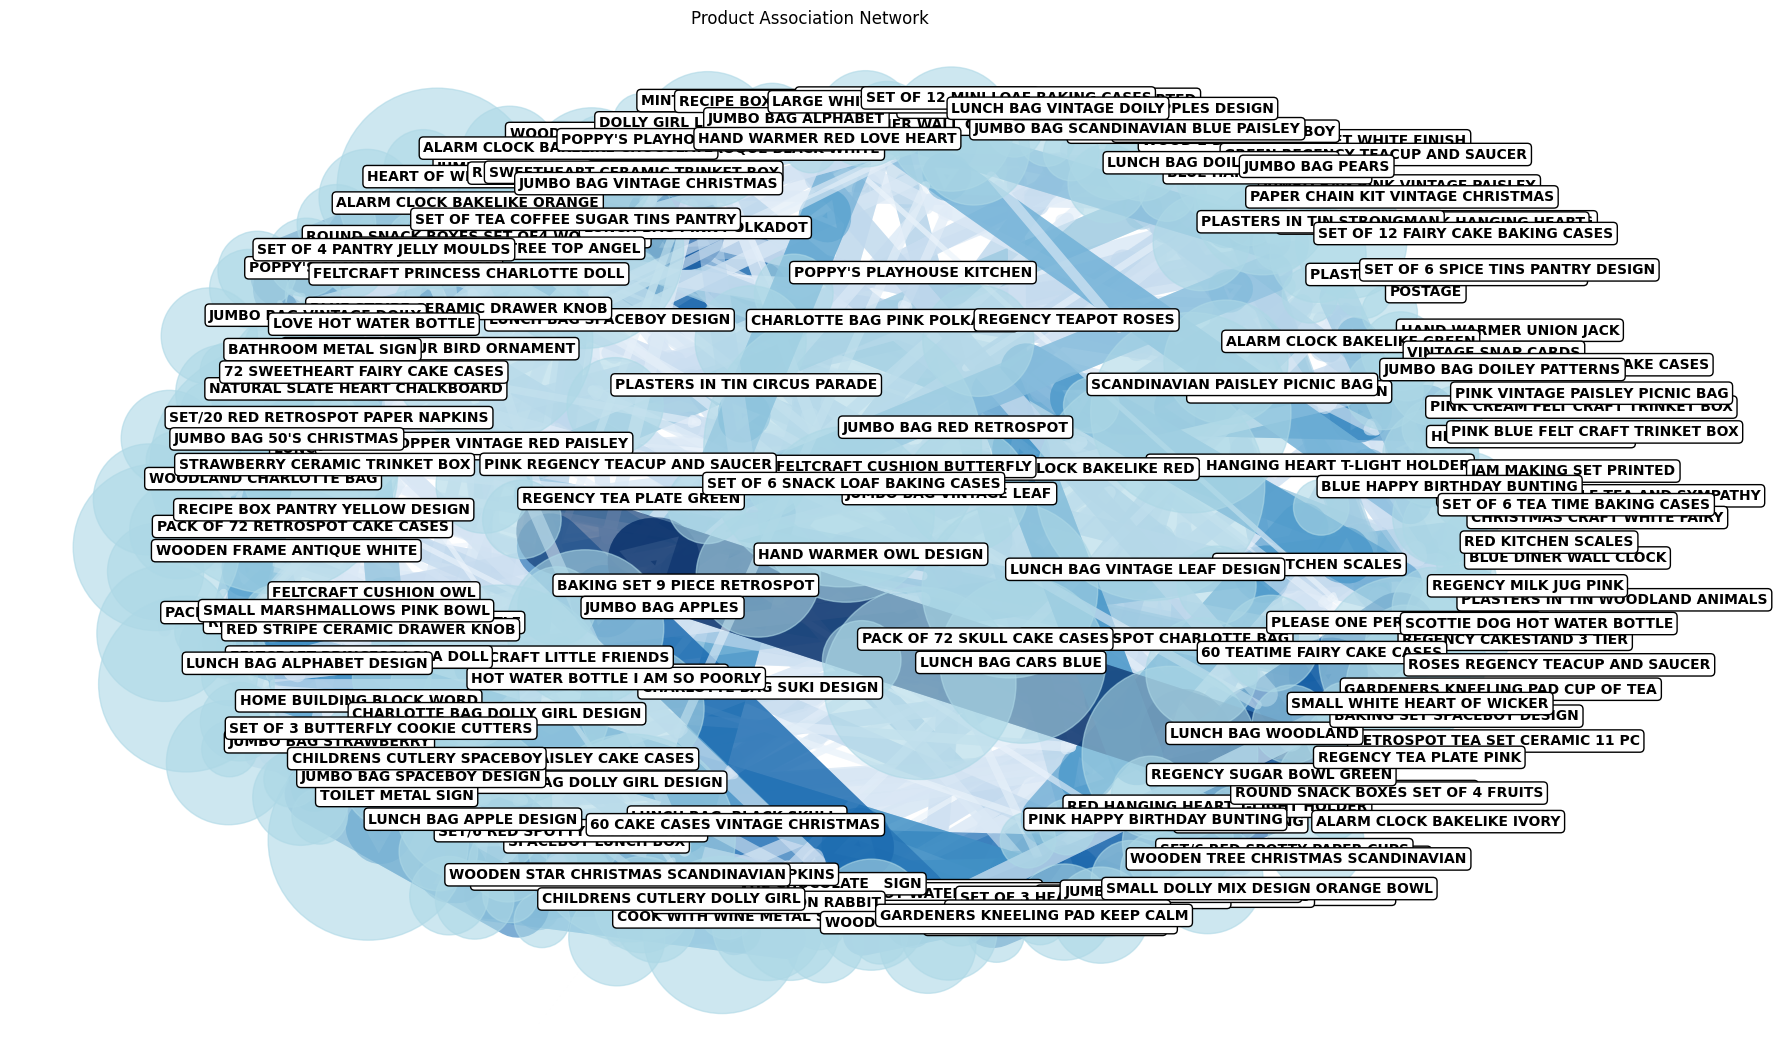

In [20]:
# Visualization: Network Graph 
def plot_network(rules):
    G = nx.DiGraph()
    for _, row in rules.iterrows():
        for a in row['antecedents']:
            for c in row['consequents']:
                G.add_edge(a, c, weight=row['lift'])
    
    plt.figure(figsize=(16, 10))
    pos = nx.spring_layout(G, k=3, scale=2)
    degrees = dict(G.degree())
    node_sizes = [degrees[node] * 800 for node in G.nodes()]
    
    edges = G.edges(data=True)
    edge_weights = [d['weight'] for (_, _, d) in edges]
    edge_colors = [d['weight'] for (_, _, d) in edges]
    
    nx.draw(
        G, pos, with_labels=False, node_color='lightblue', edge_color=edge_colors, 
        width=[w for w in edge_weights], edge_cmap=plt.cm.Blues, node_size=node_sizes, 
        alpha=0.6
    )
    
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.08, node, fontsize=10, fontweight='bold', 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    plt.title("Product Association Network")
    plt.show()

plot_network(rules)

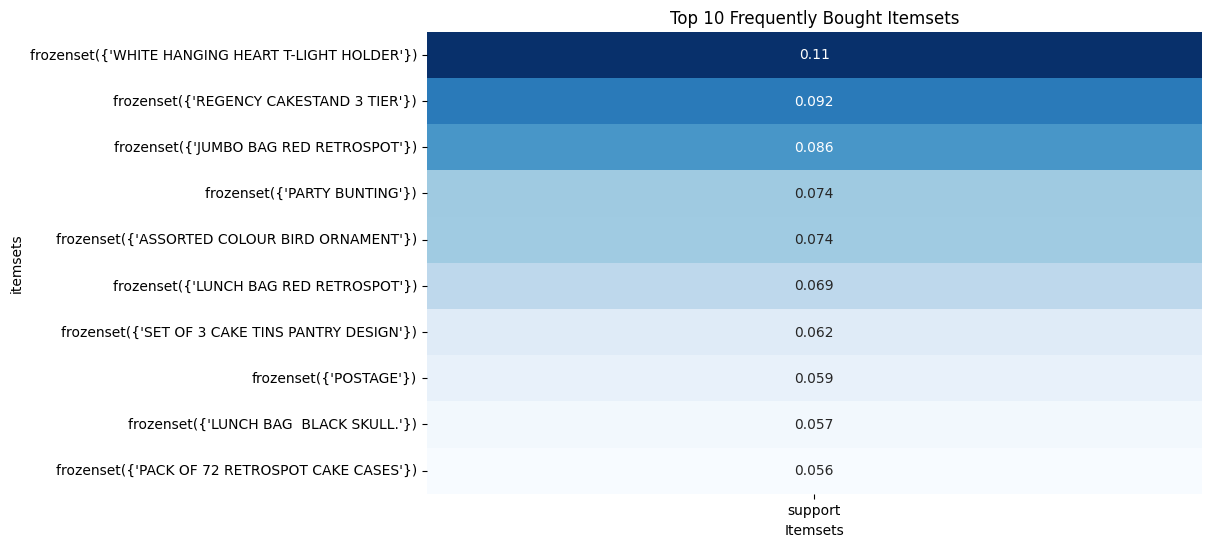

In [21]:
# Heatmap of Top Frequent Items
top_items = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.heatmap(top_items.set_index("itemsets")['support'].to_frame(), annot=True, cmap="Blues", cbar=False)
plt.title("Top 10 Frequently Bought Itemsets")
plt.xlabel("Itemsets")
plt.show()

In [ ]:
# Enhanced Recommendation Engine 
def recommend_products(purchased_items, rules, df, top_n=3):
    recommendations = []
    co_occurrence = df.groupby('InvoiceNo')['Description'].apply(list)
    
    for item in purchased_items:
        recs = rules[rules['antecedents'].apply(lambda x: item in list(x))][['consequents', 'lift']]
        
        if recs.empty:
            print(f"No rules found for: {item}. Suggesting co-occurring frequent items instead.")
            co_bought_items = [i for sublist in co_occurrence[df['Description'] == item].values for i in sublist if i != item]
            co_bought_counts = pd.Series(co_bought_items).value_counts()
            recommendations.extend(co_bought_counts.index[:top_n])
            continue  
        
        recs = recs.explode('consequents').sort_values(by='lift', ascending=False)
        recommendations.extend(recs[['consequents', 'lift']].values.tolist())
    
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    unique_recommendations = list(dict.fromkeys([item[0] for item in recommendations]))[:top_n]
    return unique_recommendations

In [23]:
# Example usage
purchased_items = ['ASSORTED COLOUR BIRD ORNAMENT','REGENCY CAKESTAND 3 TIER']
suggestions = recommend_products(purchased_items, rules, top_n=3)
print("Recommended products:", suggestions)

Recommended products: ['PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER']


In [24]:
# Example usage
purchased_items = ['PACK OF 72 RETROSPOT CAKE CASES']
suggestions = recommend_products(purchased_items, rules, top_n=3)
print("Recommended products:", suggestions)

Recommended products: ['60 CAKE CASES DOLLY GIRL DESIGN', 'PACK OF 60 SPACEBOY CAKE CASES', 'PACK OF 60 DINOSAUR CAKE CASES']


In [25]:
purchased_items = ['LUNCHBAG RED RETROSPOT']
suggestions = recommend_products(purchased_items, rules, top_n=3)
print("Recommended products:", suggestions)

No rules found for: LUNCHBAG RED RETROSPOT. Suggesting co-occurring frequent items instead.
Recommended products: []


In [26]:
purchased_items = ['HAND WARMER OWL DESIGN']
suggestions = recommend_products(purchased_items, rules, top_n=3)
print("Recommended products:", suggestions)

Recommended products: ['HAND WARMER SCOTTY DOG DESIGN', 'HAND WARMER BIRD DESIGN', 'HAND WARMER RED RETROSPOT']
